In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from helper import unregularized_model
%matplotlib inline

## Implement an unregularized NN 

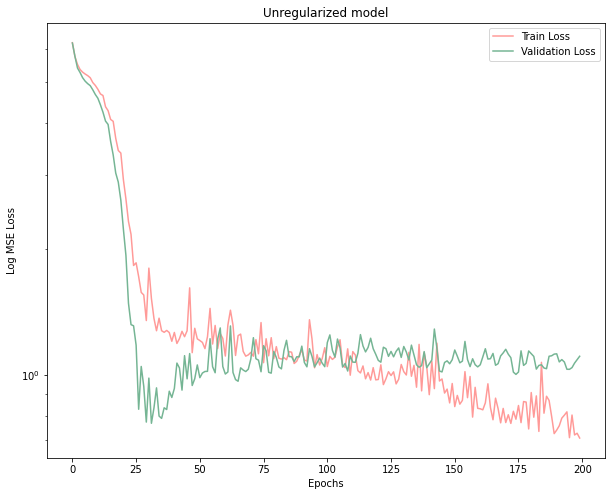

In [2]:
# Call the helper function to get the unregularized model along with the data
x_b, x_train, x_test, y_train, y_test, y_pred, mse = unregularized_model()

In [3]:
# Printing the MSE of the unregularized model
print("MSE of the unregularized model is", mse)

MSE of the unregularized model is 1.1089915570703672


### ⏸ Based on the trace plot, which patience value would you most likely choose?


#### A. 1
#### B. 5-10
#### C. 45-50
#### D. 50-75

In [4]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'B'

## Implement previous NN with early stopping 
For early stopping we build the same network but then we implement early stopping using callbacks. 

In [13]:
# Building an unregularized NN with early stopping. 
# Initialise the NN, give it an appropriate name for the ease of reading
# The FCNN has 5 layers, each with 100 nodes
model_2 = models.Sequential(name='EarlyStopping')

# Add 5 hidden layers with 100 neurons each 
# tanh is the activation for the first layer
# relu is the activation for all other layers
model_2.add(layers.Dense(100,  activation='tanh', input_shape=(1,)))
model_2.add(layers.Dense(100,  activation='ReLU'))
model_2.add(layers.Dense(100,  activation='ReLU'))
model_2.add(layers.Dense(100,  activation='ReLU'))
model_2.add(layers.Dense(100,  activation='ReLU'))

# Add the output layer with one neuron 
model_2.add(layers.Dense(1,  activation='linear'))

# View the model summary
model_2.summary()

Model: "EarlyStopping"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               200       
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,701
Trainable params: 40,701
Non-tra

In [22]:
# Use the keras early stopping callback with the patience value of your choosing 
# while monitoring the val_loss
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=100,restore_best_weights=True)

# Compile the model with MSE as loss 
# and Adam optimizer with learning rate as 0.001
opt = tf.keras.optimizers.Adam(lr=0.001)
model_2.compile(optimizer=opt,loss='mean_squared_error',metrics=['mean_squared_error'])

# Save the history about the model after fitting on the train data
# Use 0.2 validation split with 1500 epochs and batch size of 10
# Use the callback for early stopping here
history_2 = model_2.fit(x=x_train,y=y_train,batch_size=10,epochs=1500,validation_split=0.2,callbacks=callback)


Epoch 1/1500
2/2 [==============================] - 1s 475ms/step - loss: 2.6028 - mean_squared_error: 2.6028 - val_loss: 0.4090 - val_mean_squared_error: 0.4090
Epoch 2/1500
2/2 [==============================] - 0s 30ms/step - loss: 2.0431 - mean_squared_error: 2.0431 - val_loss: 0.5087 - val_mean_squared_error: 0.5087
Epoch 3/1500
2/2 [==============================] - 0s 27ms/step - loss: 2.1095 - mean_squared_error: 2.1095 - val_loss: 0.5148 - val_mean_squared_error: 0.5148
Epoch 4/1500
2/2 [==============================] - 0s 35ms/step - loss: 2.0856 - mean_squared_error: 2.0856 - val_loss: 0.2121 - val_mean_squared_error: 0.2121
Epoch 5/1500
2/2 [==============================] - 0s 33ms/step - loss: 1.5641 - mean_squared_error: 1.5641 - val_loss: 0.0676 - val_mean_squared_error: 0.0676
Epoch 6/1500
2/2 [==============================] - 0s 29ms/step - loss: 1.3007 - mean_squared_error: 1.3007 - val_loss: 0.7636 - val_mean_squared_error: 0.7636
Epoch 7/1500
2/2 [===============

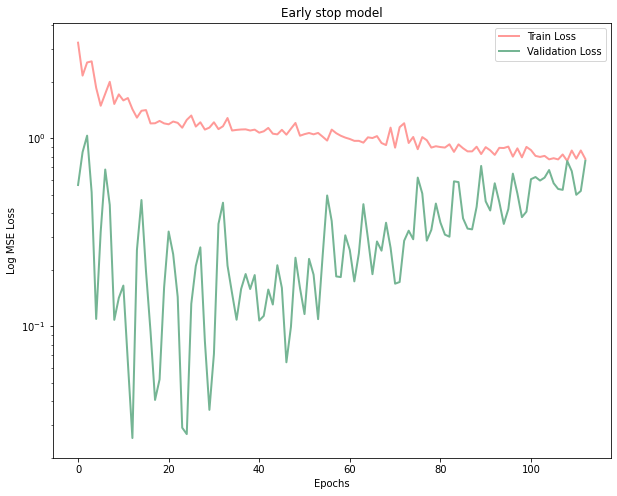

In [21]:
# Helper code to plot the data
# Plot the MSE of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Early stop model")
plt.semilogy(history_2.history['loss'], label='Train Loss', color='#FF9A98', linewidth=2)
plt.semilogy(history_2.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Log MSE Loss')
plt.legend()
plt.show()

In [23]:
### edTest(test_mse) ###
# Use the early stop implemented model above to predict for 
# x_b (used exclusively for plotting)
y_early_stop_pred = model_2.predict(x_b)

# Use the model above to predict on the test data
y_earl_stop_pred_test = model_2.predict(x_test)

# Compute the test MSE by predicting on the test data
mse_es = mean_squared_error(y_test,y_pred=y_earl_stop_pred_test)

In [24]:
# Print the MSE of the early stopped model
print("MSE of the early stopping regularized model is", mse_es)

MSE of the early stopping regularized model is 1.180136883879896


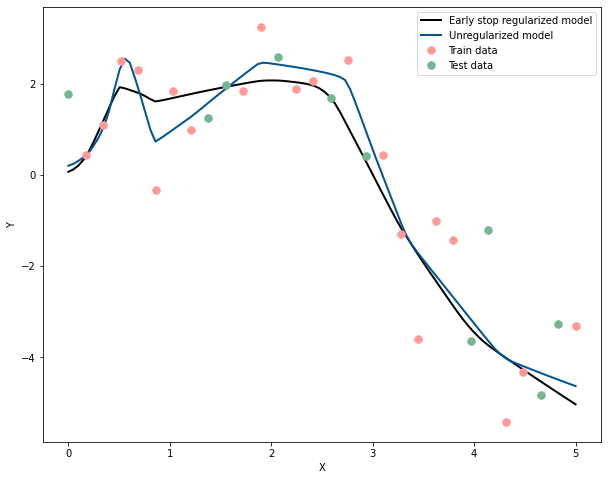

In [19]:
# Use the helper code to plot the predicted data

# Plotting the predicted data using the L2 regularized model
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x_b, y_early_stop_pred, label='Early stop regularized model', color='black', linewidth=2)

# Plotting the predicted data using the unregularized model
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#005493', linewidth=2)

# Plotting the training data
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plotting the testing data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### ⏸ **After marking, change the patience parameter once to 2 and once to 100 in the early stopping callback with the same data. Do you notice any change? Which value is more efficient?**

In [0]:
### edTest(test_chow2) ###
# Type your answer within in the quotes given

answer2 = 'Pateince=100 allows more epoch training and yield '